2021


In [91]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

files = sorted(glob.glob("*.nc"))
files

In [200]:
#format is 'fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc''
fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc'

print('6.26 :0')






fn1 = 'summer2024/2024-06-30T19:00:35.709157000.nc'
fn2 = 'summer2024/2024-07-08T19:00:48.578704000.nc'
fn3 = 'summer2024/2024-07-16T19:00:52.980989000.nc'
fn4 = 'summer2024/2024-07-24T19:01:02.974514000.nc'
fn5 = 'summer2024/2024-08-01T19:00:55.969839000.nc'
fn6 = 'summer2024/2024-08-09T19:01:01.003032000.nc'
fn7 = 'summer2024/2024-08-17T19:01:04.812884000.nc'
fn8 = 'summer2024/2024-08-25T19:01:11.381238000.nc'
fn9 = 'summer2024/2024-09-02T19:01:10.309839000.nc'
fn10 = 'summer2024/2024-09-10T19:01:19.035063000.nc'
fn11 = 'summer2024/2024-09-18T19:01:14.981063000.nc'
fn12 = 'summer2024/2024-09-26T19:01:17.202456000.nc'
# fn13 = '2023-09-04T19:01:25.437238000.nc'
# fn14 = '2023-09-11T19:01:25.437238000.nc'
# fn15 =
# fn16 =
# fn17 =
# fn18 =
# fn19 =
# fn20 =


6.26 :0


In [201]:
#filesnames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12, fn13, fn14, fn15, fn16]
#filenames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11]
filenames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12]

#fn12]
             #, fn6, fn7, fn8, fn9]
datasets = [xr.open_dataset(fn) for fn in filenames]
ds1 = xr.open_dataset(fn1)
ds2 = xr.open_dataset(fn2)
ds3 = xr.open_dataset(fn3)
ds4 = xr.open_dataset(fn4)
ds5 = xr.open_dataset(fn5)
ds6 = xr.open_dataset(fn6)
ds7 = xr.open_dataset(fn7)
ds8 = xr.open_dataset(fn8)
ds9 = xr.open_dataset(fn9)
ds10= xr.open_dataset(fn10)
ds11= xr.open_dataset(fn11)
ds12= xr.open_dataset(fn12)
# # ds13= xr.open_dataset(fn13)
# ds14= xr.open_dataset(fn14)
# # ds15= xr.open_dataset(fn15)
# # ds16= xr.open_dataset(fn16)

In [22]:
ds3

<xarray.Dataset> Size: 149MB
Dimensions:           (y: 1974, x: 1675)
Coordinates:
  * y                 (y) float64 16kB 5.42e+06 5.42e+06 ... 5.361e+06 5.361e+06
  * x                 (x) float64 13kB 4.75e+05 4.751e+05 ... 5.253e+05
    time              datetime64[ns] 8B ...
Data variables: (12/21)
    spatial_ref       int32 4B ...
    qa                (y, x) int16 7MB ...
    red               (y, x) uint16 7MB ...
    blue              (y, x) uint16 7MB ...
    drad              (y, x) int16 7MB ...
    emis              (y, x) int16 7MB ...
    ...                ...
    swir22            (y, x) uint16 7MB ...
    coastal           (y, x) uint16 7MB ...
    qa_pixel          (y, x) uint16 7MB ...
    qa_radsat         (y, x) uint16 7MB ...
    qa_aerosol        (y, x) uint8 3MB ...
    temperature_degC  (y, x) float64 26MB ...

ds

In [229]:
#1 plot

#dss = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12, ds13, ds14, ds15, ds16]
dss = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12]   
     


(48.465113, -122.952554)

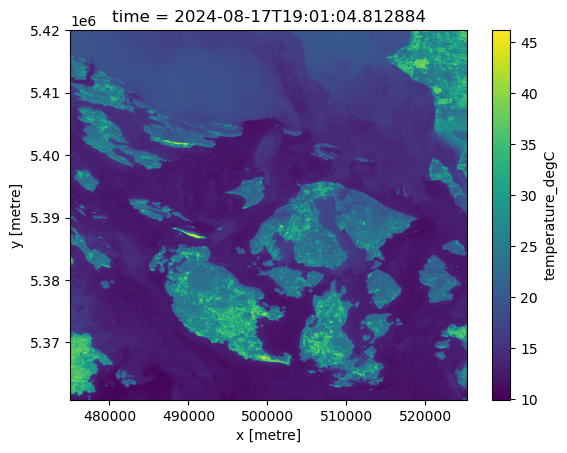

In [198]:
ds7['temperature_degC'].plot()

48.465113, -122.952554


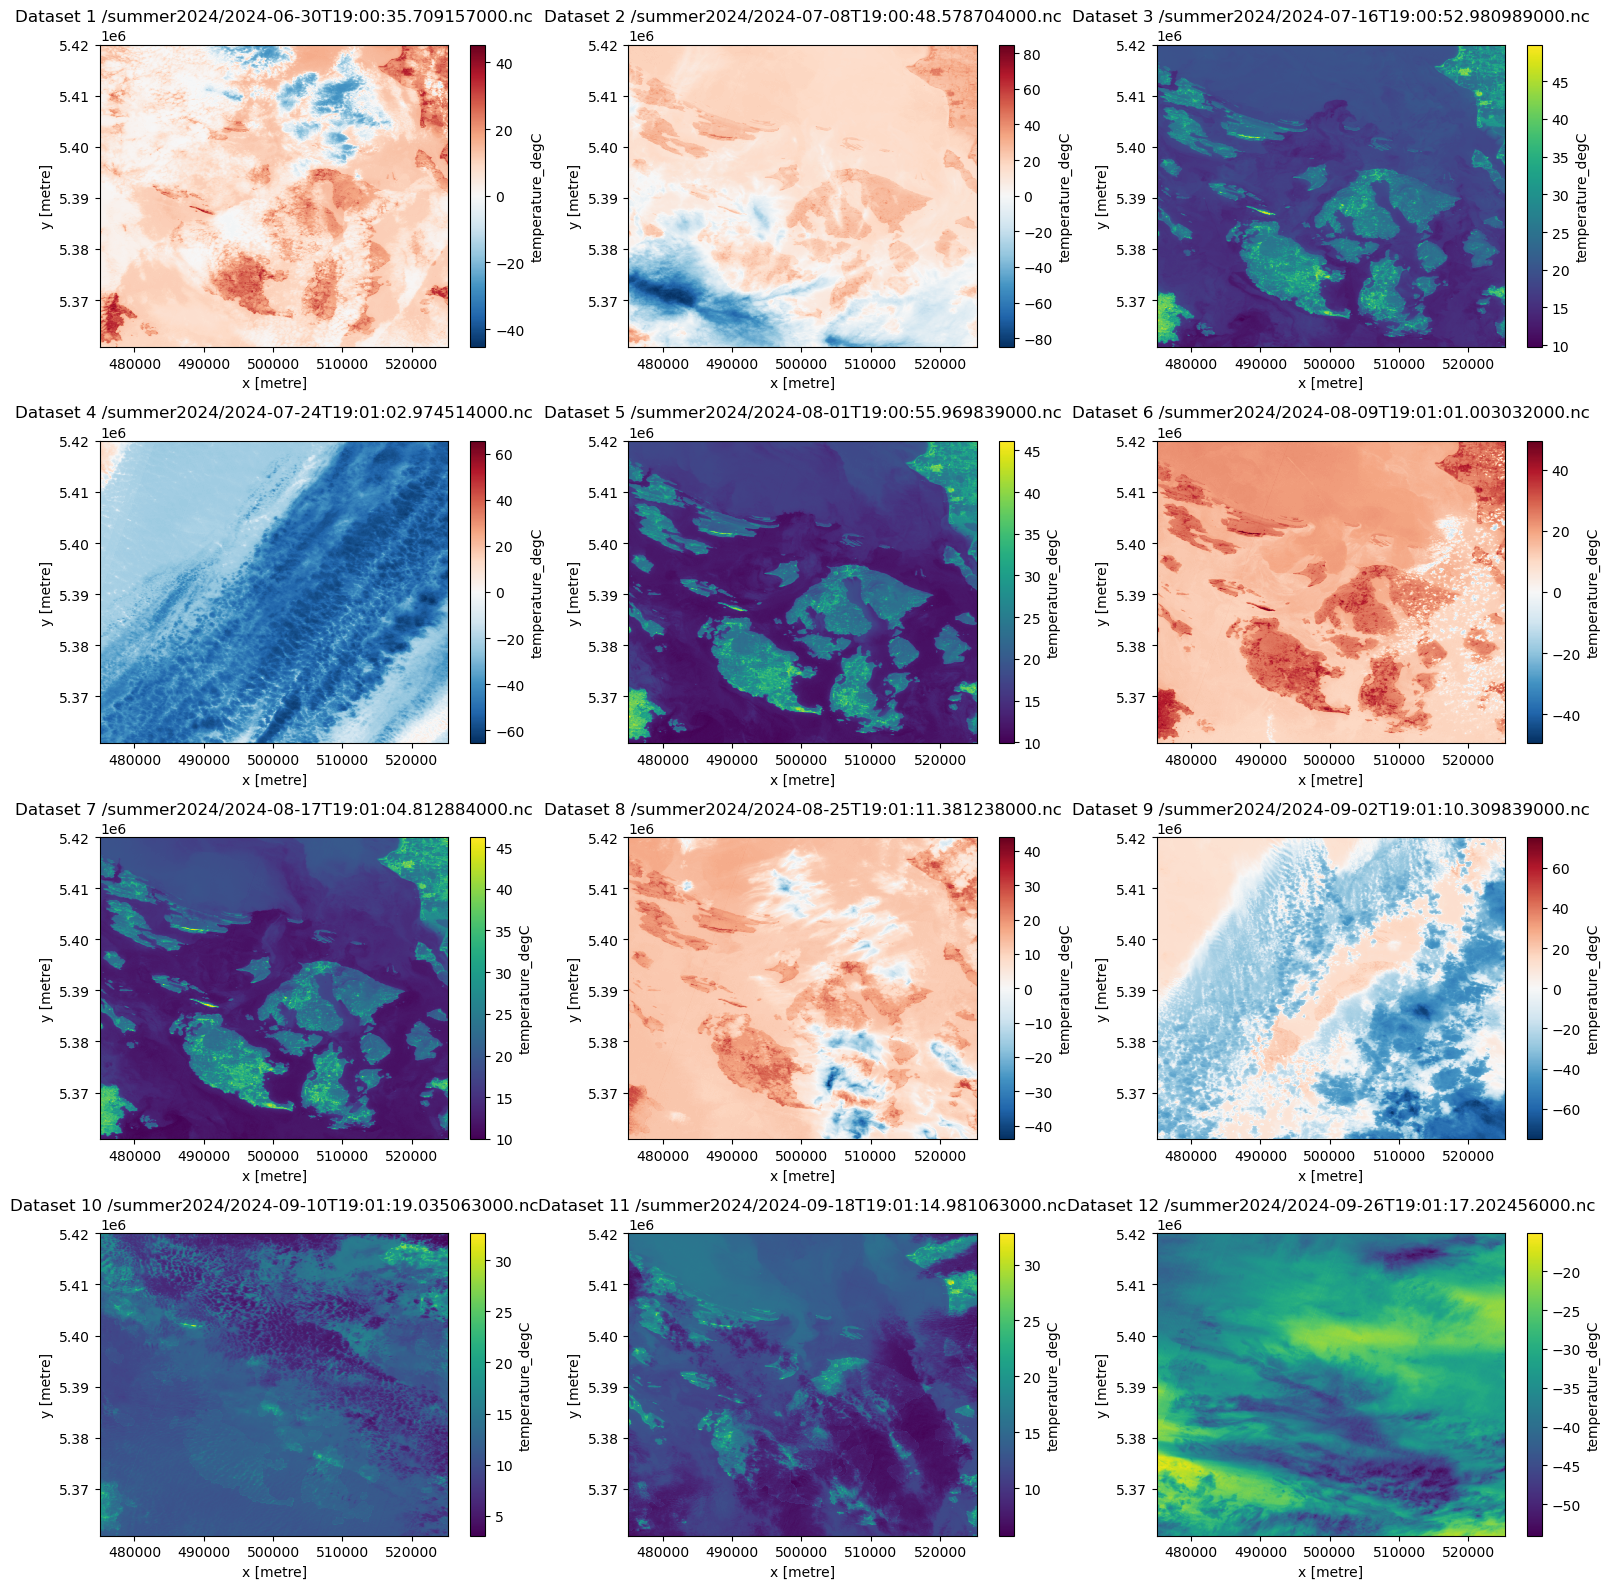

In [206]:
#all plots

fig, axes = plt.subplots(4, 3, figsize=(16, 16))  #edit args to fit # of plots needed
axes = axes.flatten() 


for i, d in enumerate(dss):
    d['temperature_degC'].plot(ax=axes[i])  # Specify subplot
    axes[i].set_title(f"Dataset {i+1} " + d.encoding['source'][31:])     # Optional title

plt.tight_layout()
plt.show()

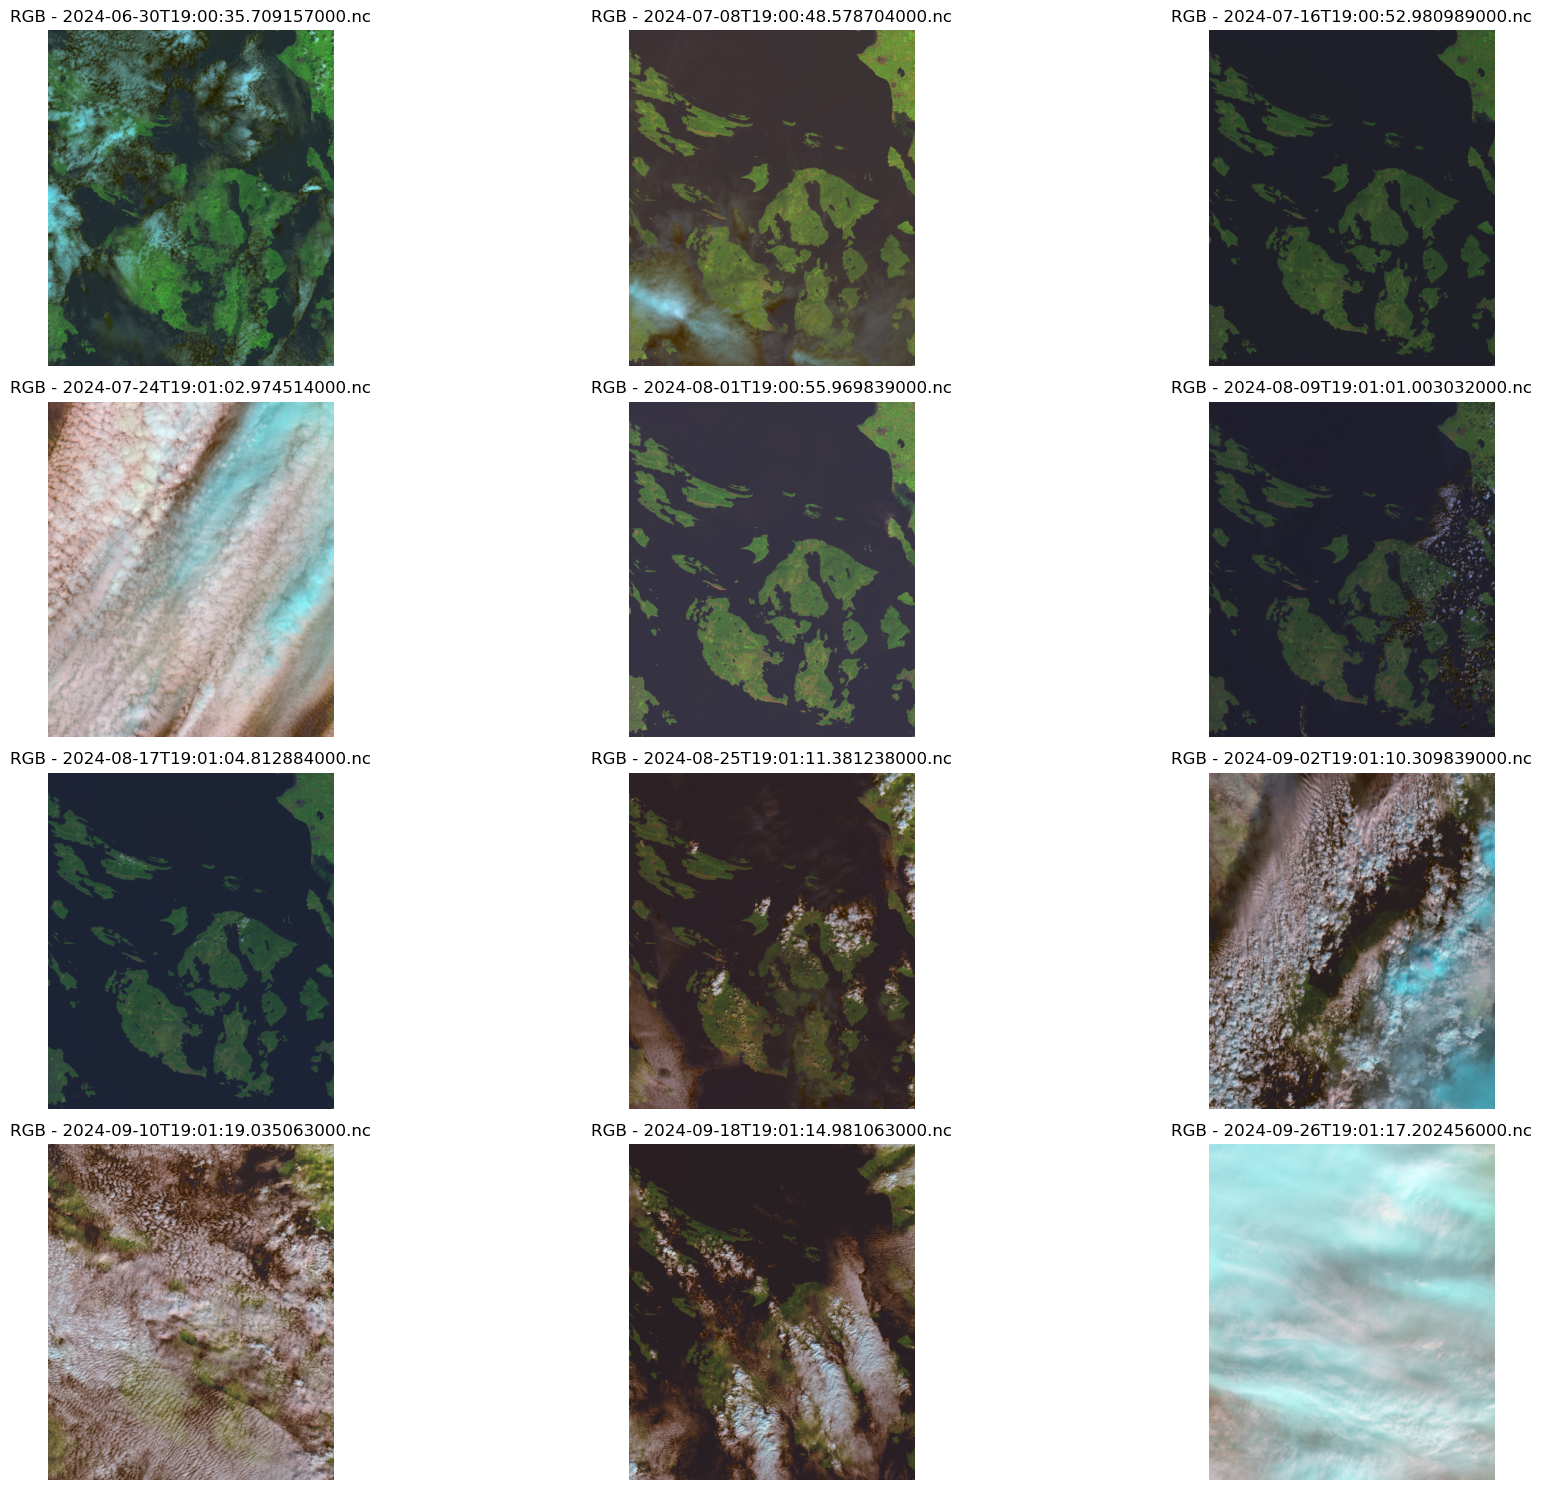

In [212]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for i, ds in enumerate(dss):
    # Normalize each band
    swir16_norm = ds['swir16'] / np.max(ds['swir16'])
    nir08_norm = ds['nir08'] / np.max(ds['nir08'])
    blue_norm = ds['blue'] / np.max(ds['blue'])
    
    # Stack into RGB
    rgb_image = np.stack([
        swir16_norm.values,
        nir08_norm.values,
        blue_norm.values
    ], axis=-1)
    
    # Plot
    axes[i].imshow(rgb_image)
    axes[i].axis('off')
    
    # Title from source path if available
    source = ds.encoding.get('source', f"Image {i+1}")
    axes[i].set_title("RGB - " + source[-32:])  # Adjust slicing as needed

plt.tight_layout()
plt.show()

In [243]:
#this code converts from latlong
#got this point from google maps off of CP, had to convert from latlong (WGS84) (world geodetic system 1984) into UTM 10-N
#important to note: latlong is EPSG:4326, UTM is EPSG:32610
#UTM 10N is specifically western washington + a little more
from shapely.geometry import Point
#Point has functions like buffer, etc, which we used to make circle
#shapely is vector data
import geopandas as gpd 

# Define the lat/lon point
lat_lon_point = Point(-122.952554, 48.465113)

#latlong points (also in excel file)
#FHL SJ Channel: (-122.999792, 48.549525)
#FHL Harbor: (-123.009148, 48.543532)
#Cattle Point: (-122.952554, 48.465113)

# Create a GeoDataFrame with the point and its original CRS (EPSG:4326)
gdf = gpd.GeoDataFrame(geometry=[lat_lon_point], crs="EPSG:4326")
#geopandas is able to convert btwn coords pretty easily, so made a GeoDataFrame for that reason only - csv with 1 item in it, essentially

# Reproject the GeoDataFrame to the target CRS (EPSG:32610)
gdf_reprojected = gdf.to_crs("EPSG:32610")
#coordinate reference system

# Extract the reprojected point
reprojected_point = gdf_reprojected.geometry[0]
print(reprojected_point)

POINT (503507.328175198 5367998.7916395)


In [172]:
reprojected_point.x



499324.7991388869

In [244]:
#extracting data from a single point
#


for ds in dss:
    ds.interp(x=reprojected_point.x, y=reprojected_point.y, method='nearest') #nearest vs linear = method used to get values at point from gridded data set

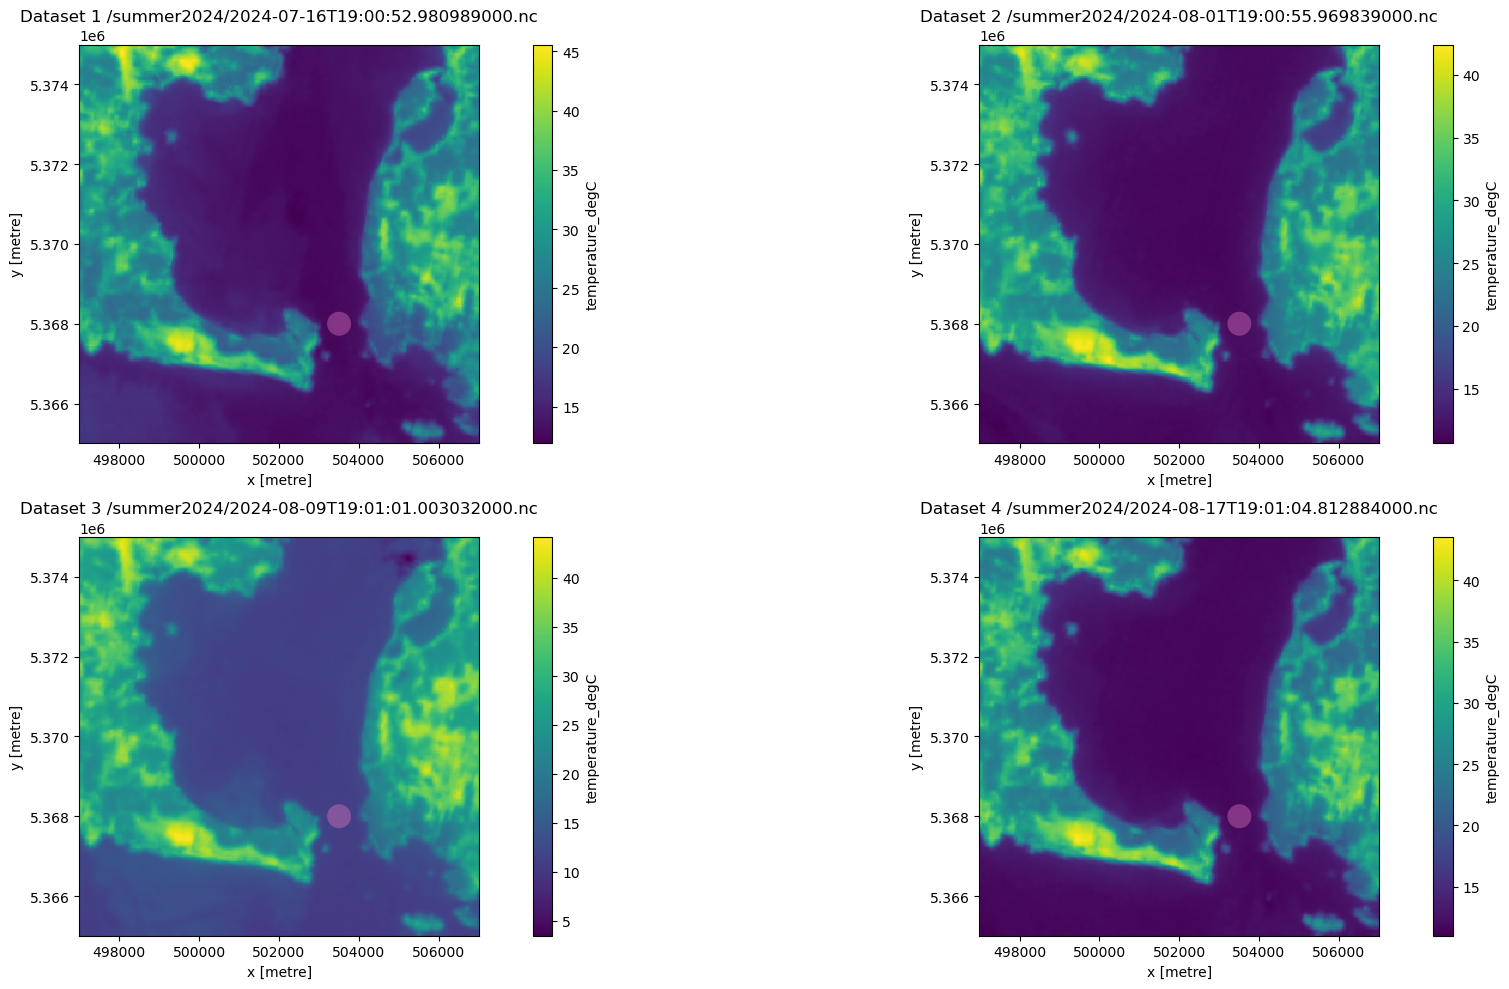

In [245]:
#extracting data for an area
#using a buffer function 
#.buffer() makes a polygon
#again, using GeoDataFrame as a convenient way to do things - table w/ one item in it

gdf = gpd.GeoDataFrame(
    geometry=[reprojected_point.buffer(300)], 
    crs="EPSG:32610"
)


fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax = ax.flatten()


#UMT coords: Y, X, y goes in descending order for ranges 
#FHL SJ channel: 	5377380.58  500015.3504
#FHL Harbor: 	5376714.459   499324.7991
#Cattle Point: 	5367998.792   503507.3282


for i, (ds, ax) in enumerate(zip(dss, ax)):
    ds['temperature_degC'].loc[5.375e6:5.365e6, 4.97e5:5.07e5].plot(ax = ax)
    gdf.plot(ax=ax, color='tab:pink', alpha=0.4)
    ax.set_title(f"Dataset {i+1} " + ds.encoding['source'][31:])  # Optional title
#plt.ylim(5.36e6, 5.37e6)

plt.tight_layout()
plt.show()
#using gdf to plot

In [211]:
ds

<xarray.Dataset> Size: 149MB
Dimensions:           (y: 1974, x: 1675)
Coordinates:
  * y                 (y) float64 16kB 5.42e+06 5.42e+06 ... 5.361e+06 5.361e+06
  * x                 (x) float64 13kB 4.75e+05 4.751e+05 ... 5.253e+05
    time              datetime64[ns] 8B ...
Data variables: (12/21)
    spatial_ref       int32 4B ...
    qa                (y, x) int16 7MB ...
    red               (y, x) uint16 7MB ...
    blue              (y, x) uint16 7MB 44697 44743 44775 ... 29586 29577 29543
    drad              (y, x) int16 7MB ...
    emis              (y, x) int16 7MB ...
    ...                ...
    swir22            (y, x) uint16 7MB ...
    coastal           (y, x) uint16 7MB ...
    qa_pixel          (y, x) uint16 7MB ...
    qa_radsat         (y, x) uint16 7MB ...
    qa_aerosol        (y, x) uint8 3MB ...
    temperature_degC  (y, x) float64 26MB ...

In [246]:
dscs = []

for ds in dss:
    ds = ds.rio.write_crs('EPSG:32610')
    #clipping all data to just the circle and getting what's inside
    #getting rid of all_touched=True makes it default False
    dsclipped = ds.rio.clip(gdf.geometry, all_touched=True) #make clipping mask, circle shape
    dscs.append(dsclipped) #add to list
#in order to use rio.clip, needed to make sure that ds had "i am in UTM coords" written in the right place
#so write_crs does that for us


/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:253: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:253: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:253: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:253: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


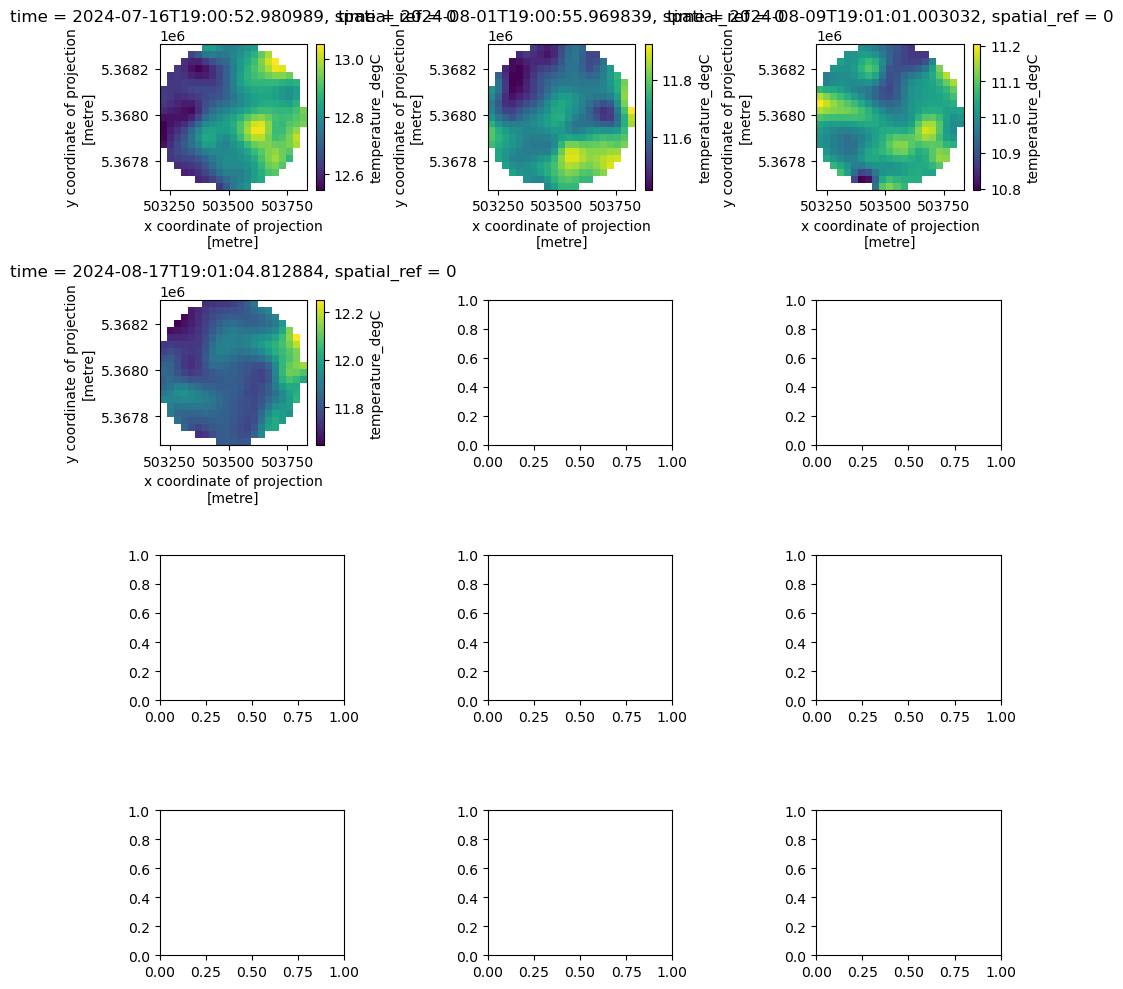

In [247]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
ax = ax.flatten()

for i, (dsclipped, ax) in enumerate(zip(dscs, ax)):
    dsclipped['temperature_degC'].plot(ax=ax)

    
    #ax.set_title(f"Dataset {i+1} " + dsclipped.encoding['source'][31:])  # Optional title
#plt.ylim(5.36e6, 5.37e6)



plt.tight_layout()
plt.show()


#plotting!

In [248]:
#dsclipped.temperature_celsius.mean(dim=["x", "y"])
dscs_meantemps = []
for dsclipped in dscs:
    dscs_meantemps.append(dsclipped['temperature_degC'].mean(dim=["x", "y"]))
#dsclipped.mean(dim=["x", "y"])



In [249]:
dscs_meantemps



[<xarray.DataArray 'temperature_degC' ()> Size: 8B
 array(12.77772167)
 Coordinates:
     time         datetime64[ns] 8B ...
     spatial_ref  int64 8B 0,
 <xarray.DataArray 'temperature_degC' ()> Size: 8B
 array(11.65139157)
 Coordinates:
     time         datetime64[ns] 8B ...
     spatial_ref  int64 8B 0,
 <xarray.DataArray 'temperature_degC' ()> Size: 8B
 array(11.01950582)
 Coordinates:
     time         datetime64[ns] 8B ...
     spatial_ref  int64 8B 0,
 <xarray.DataArray 'temperature_degC' ()> Size: 8B
 array(11.85562557)
 Coordinates:
     time         datetime64[ns] 8B ...
     spatial_ref  int64 8B 0]

In [ ]:
dsclipped

<xarray.Dataset> Size: 960B
Dimensions:              (y: 7, x: 6)
Coordinates:
  * y                    (y) float64 56B 5.368e+06 5.368e+06 ... 5.368e+06
  * x                    (x) float64 48B 5.034e+05 5.035e+05 ... 5.036e+05
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                (y, x) uint16 84B 0 7130 7138 7143 7135 ... 0 7134 0 0
    red                  (y, x) uint16 84B 0 7130 7149 7148 7139 ... 0 7143 0 0
    green                (y, x) uint16 84B 0 7648 7650 7632 7625 ... 0 7625 0 0
    blue                 (y, x) uint16 84B 0 7500 7513 7517 7510 ... 0 7494 0 0
    qa_pixel             (y, x) uint16 84B 1 21952 21952 21952 ... 1 21952 1 1
    lwir11               (y, x) uint16 84B 0 39541 39549 39556 ... 0 39539 0 0
    temperature_celsius  (y, x) float64 336B nan 11.0 11.03 ... 11.0 nan nan